# Oblig 2.

## MAT4110

### John-Magnus Johnsen

##### Wednesday 22. october 2025

When using *Singular Value Decomposition* (*SVD*) to compress a grayscale image, we first must turn the image into a matrix where the elements corresponds to the pixels. The values of these elements will for a grayscale image range from 0 to 255, representing the light intensity for each pixel, from black (0) to white (255). An image of hight $m$ and width $n$ pixels, thus become a $(m \times n)$ matrix. Since each element of the matrix is a number between 0 and 255, we need to allocate 8 *bits* of storage per element, $256 = 2^8$, this is also called a *byte*. Then for an $(m \times n)$ image, there would be, $s = mn$ elements in total, needing $s$ *bytes* of storage. The point of compression is to reduce the amount of storage space needed, without effecting the visual appearance too much. It is also to note that we are not doing anything to the image resolution in this compression.

If $\boldsymbol{A}$ is an $(m \times n)$ matrix as described above, it is also customary to normalize the element values by scaling them as fractions of 255, turning them from an integer to a floating-point number.

The *SVD* of a matrix $\boldsymbol{A}$ with shape $(m \times n)$ yield the matrices $\boldsymbol{USV}^T$, where there shapes are $(m \times m)(m \times n)(n \times n)$ respectively. By using only the first $r$ singular values in $S$

We see that the original resolution of the image stays the same using this style of compression.

In [106]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [107]:
# Import images
img1 = cv2.imread("img1.png", cv2.IMREAD_GRAYSCALE) # Read image as matrix and convert it to grayscale, values between 0 and 255.
img2 = cv2.imread("img2.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("img3.jpg", cv2.IMREAD_GRAYSCALE)

# Process images
img1 = img1.astype(np.float64)/255  # Turn entries to float numbers and normalize, now values are between 0 and 1.
img2 = img2.astype(np.float64)/255
img3 = img3.astype(np.float64)/255

In [108]:
def compress_svd_plot(img_gray_normzd, r):
    """Compress normalized grayscale image using SVD, then plot given a number of singular values.
     Take img_gray_normzd, and number of singular values r.
     Plot compressed and original image next to each other.
     Return nothing."""
    U, S, VT = np.linalg.svd(img_gray_normzd)
    S = np.diag(S)  # Turn the 1D singular values into an 2D array, diagonal matrix, holding the singular values.

    img_comp = U[:, :r] @ S[:r, :r] @ VT[:r, :] # Slice away the columns of U and rows of VT, corresponding to r, such that we obtain the shapes: (m x r)(r x r)(r x n)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax1.imshow(img_comp, cmap="gray")
    ax1.axis("off")
    ax1.set_title(f"Compressed, r = {r}")
    ax2.imshow(img_gray_normzd, cmap="gray")
    ax2.axis("off")
    ax2.set_title("Original")
    plt.tight_layout()
    plt.show()
    plt.close()

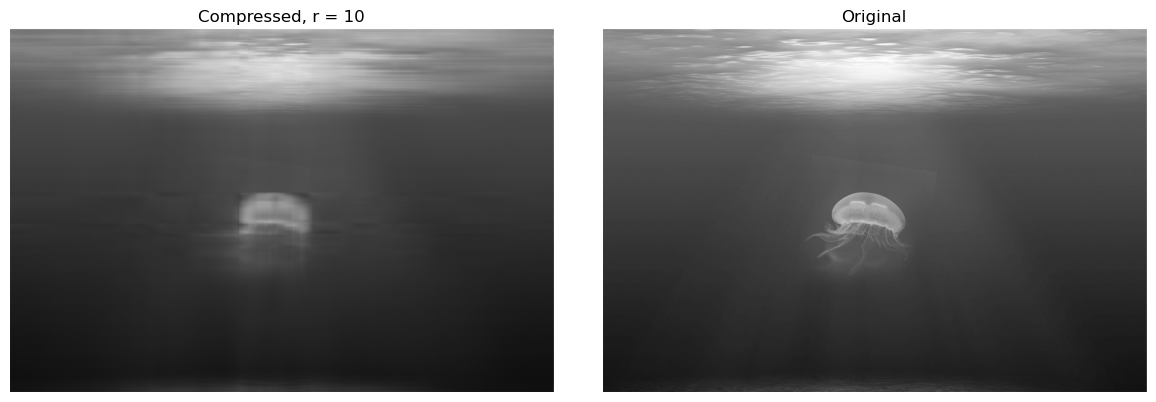

In [109]:
compress_svd_plot(img2, 10)

In [20]:
# Print matrix representation

print(img1)
print("################################")
print(img2)
print("################################")
print(img3)

[[1.         1.         1.         ... 0.         0.         0.08235294]
 [1.         1.         1.         ... 0.         0.         0.09019608]
 [1.         1.         1.         ... 0.         0.         0.09019608]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]
################################
[[0.75294118 0.72156863 0.7254902  ... 0.77254902 0.73333333 0.8627451 ]
 [0.57254902 0.5372549  0.54117647 ... 0.63137255 0.6        0.7372549 ]
 [0.6        0.56862745 0.56862745 ... 0.65490196 0.63137255 0.76862745]
 ...
 [0.28627451 0.25098039 0.25098039 ... 0.24705882 0.19215686 0.49411765]
 [0.26666667 0.23529412 0.23921569 ... 0.23921569 0.18431373 0.47843137]
 [0.30196078 0.2745098  0.28235294 ... 0.29411765 0.23921569 0.5254902 ]]
################################
[[0.85490196 0.85490196 0.85882353 ... 0.83921

In [24]:
U1, S1, VT1 = np.linalg.svd(img1)

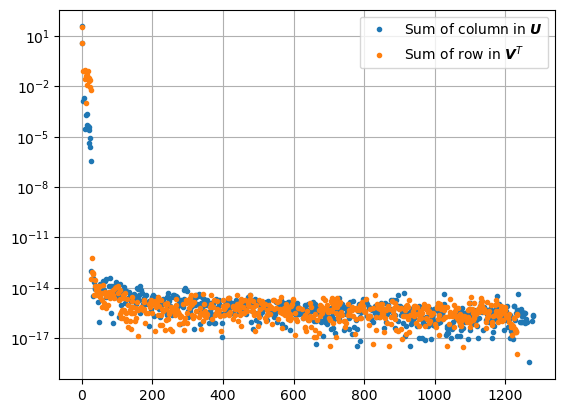

In [83]:
plt.semilogy(np.sum(U1, axis=0), ".", label=r"Sum of column in $\boldsymbol{U}$")
plt.semilogy(np.sum(VT1, axis=1), ".", label=r"Sum of row in $\boldsymbol{V}^T$")
plt.grid()
plt.legend()
plt.show()
plt.close()

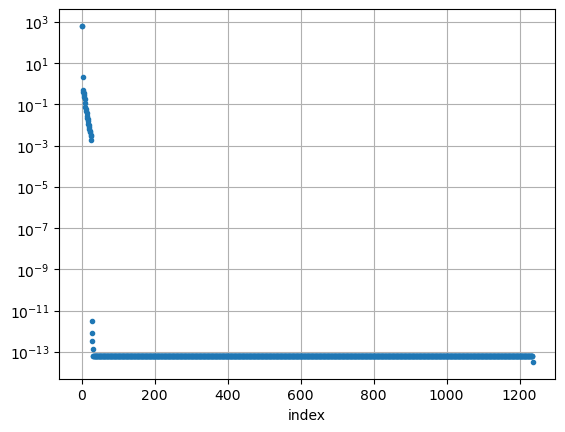

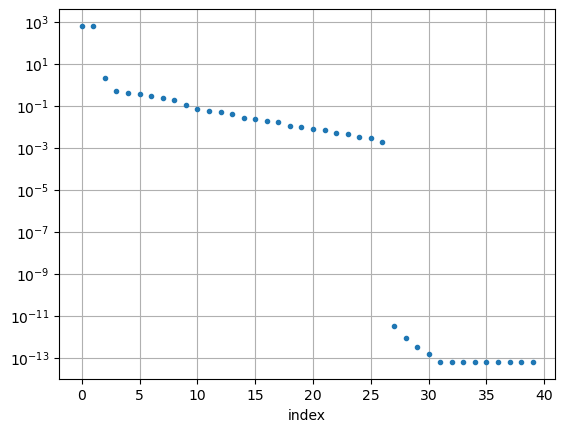

In [45]:
plt.semilogy(S1, ".")
plt.xlabel("index")
plt.grid()
plt.show()
plt.close()

plt.semilogy(S1[:40], ".")
plt.xlabel("index")
plt.grid()
plt.show()
plt.close()

In [14]:
img1.shape

(1280, 1237)

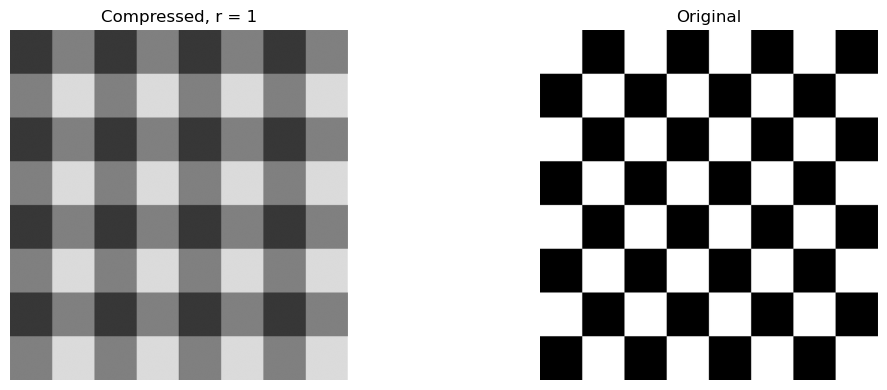

In [101]:
compress_svd_plot(img1, 1)

In [41]:
U2, S2, VT2 = np.linalg.svd(img2)

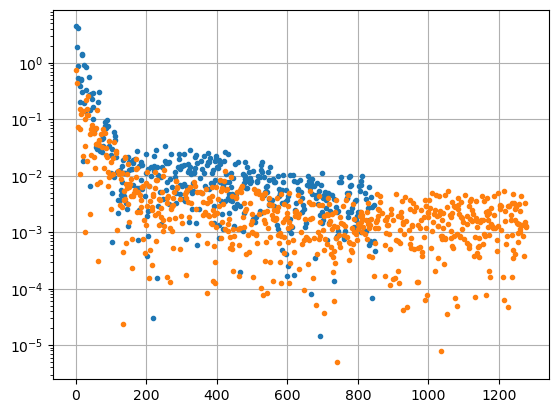

In [42]:
plt.semilogy(np.sum(U2, axis=0), ".")
plt.semilogy(np.sum(VT2, axis=1), ".")
plt.grid()
plt.show()
plt.close()

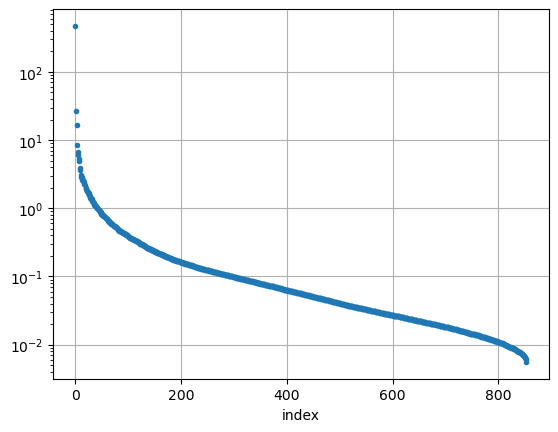

In [95]:
plt.semilogy(S2, ".")
plt.xlabel("index")
plt.grid()
plt.show()
plt.close()

In [17]:
img2.shape

(854, 1280)

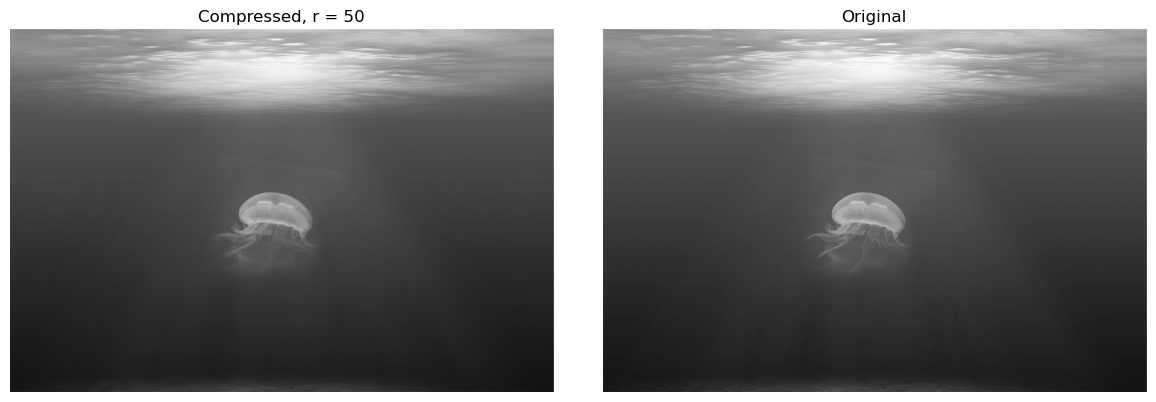

In [94]:
compress_svd_plot(img2, 50)

In [39]:
U3, S3, VT3 = np.linalg.svd(img3)

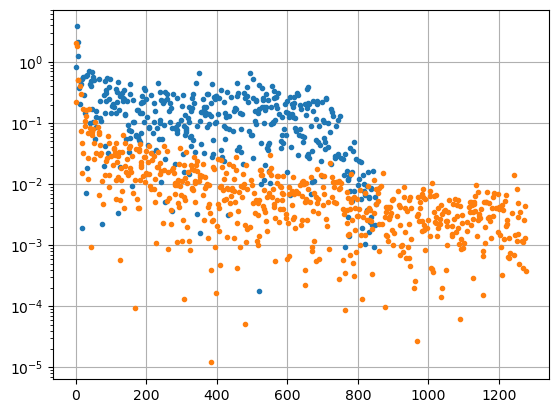

In [40]:
plt.semilogy(np.sum(U3, axis=0), ".")
plt.semilogy(np.sum(VT3, axis=1), ".")
plt.grid()
plt.show()
plt.close()

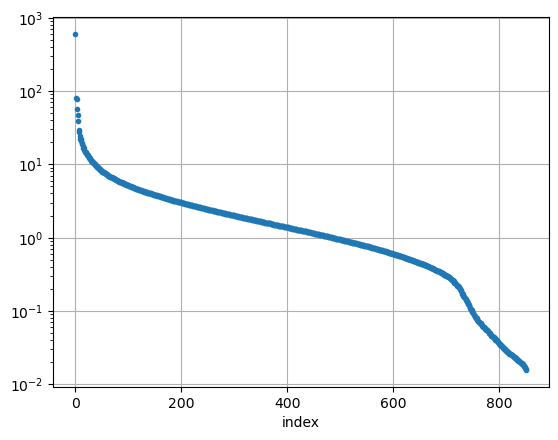

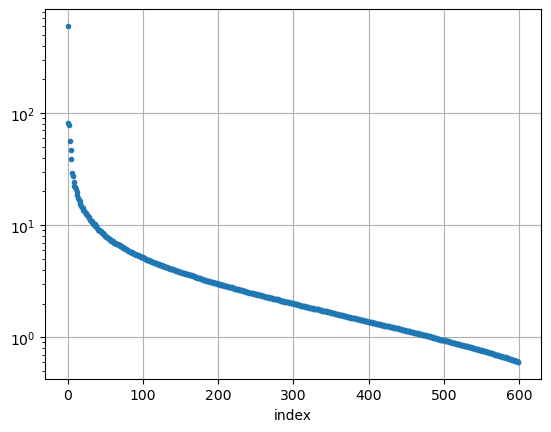

In [20]:
plt.semilogy(S3, ".")
plt.xlabel("index")
plt.grid()
plt.show()
plt.close()

plt.semilogy(S3[:600], ".")
plt.xlabel("index")
plt.grid()
plt.show()
plt.close()

In [21]:
img3.shape

(853, 1280)

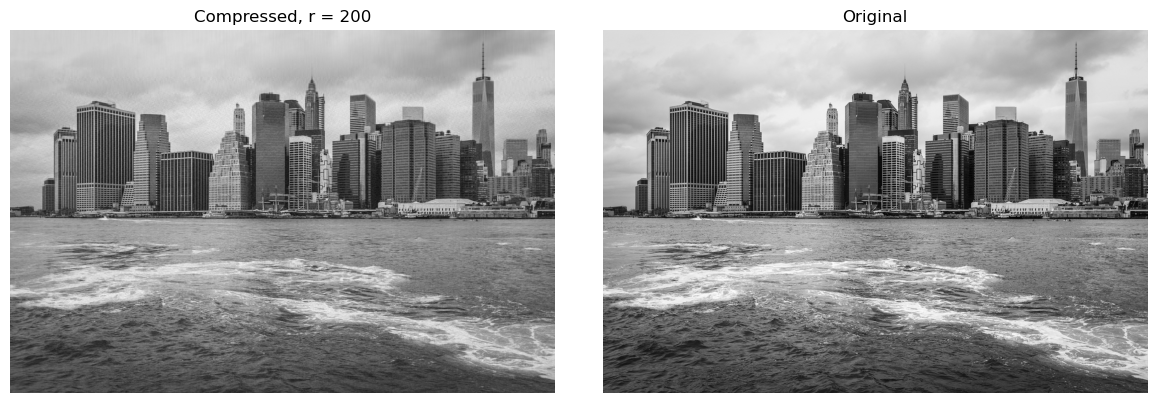

In [99]:
compress_svd_plot(img3, 200)

The shape of the factors $\boldsymbol{U}$, $\boldsymbol{S}$, and $\boldsymbol{V}^T$ after performing $\it{SVD}$ on matrix $\boldsymbol{A}$, shape $(m \times n)$, is: $(m \times m)(m \times n)(n \times n)$. From `np.linalg.svd` we get the singular values as an 1-D array. So we construct the matrix. Original image resolution is preserved, but the three matrices of the SVD are changed.

In [23]:
u_new, s_new, v_new = np.linalg.svd(img3_mod)